## Rastgele Orman Algoritması

Rastgele orman, denetimli bir öğrenme algoritmasıdır. İki varyasyonu vardır - biri sınıflandırma problemleri için, diğeri ise regresyon problemleri için kullanılır. En esnek ve kullanımı kolay algoritmalardan biridir. Verilen veri örnekleri üzerinde karar ağaçları oluşturur, her ağaçtan tahmin alır ve oylama yoluyla en iyi çözümü seçer. 

Rastgele orman algoritması, birden fazla karar ağacını birleştirerek bir ağaç ormanı ile sonuçlanır, bu nedenle Rastgele Orman adı kullanılmaktadır. Rastgele orman modelinde, ormandaki ağaç sayısı ne kadar yüksek olursa, doğruluk da o kadar yüksek olur.

Rastgele orman algoritması çalışma akışı iki aşamaya ayrılabilir.

İlk aşamada, toplam `m` öznitelik içinden rastgele `k` sayıda özniteliği seçip rastgele ormanı oluşturuyoruz:

1. `k<m` koşulu sağlanarak, toplam `m` öznitelik arasından rastgele `k` sayıda özniteliği seçin seçin.
2. `k` öznitelikleri arasında, en iyi ayırma noktasını kullanarak `d` düğümünü hesaplayın.
3. En iyi bölmeyi kullanarak düğümü ek düğümlere ayırın.
4. `l` düğüm sayısına ulaşılana kadar 1 - 3 adımlarını tekrarlayın.
5. `n` sayıda ağaç oluşturmak için 1'den 4'e kadar olan adımları `n` kez tekrarlayarak orman oluşturun.

İkinci aşamada, eğitilmiş rastgele orman algoritmasını kullanarak tahminler yapıyoruz:

1. Test için ayrılan verileri kullanarak, tahmin sonuçlarını bulmak için eğitilmiş modeli bu test verileri üzerinde çalıştırıyoruz. 
2. Ardından, tahmin edilen her veri için ormanın ürettiği oyları hesaplıyoruz.
3. Son olarak, en yüksek oyu veren ağacın tahmin sonucunu rastgele orman algoritmasının nihai tahmini olarak düşünüyoruz.

Rastgele orman algoritmasının avantajları şunlardır: 

- Rastgele orman algoritması hem sınıflandırma hem de regresyon problemlerini çözmek için kullanılabilir.
- Tahmin yapmak için çok sayıda karar ağacı kullandığı için çok doğru ve sağlam bir model olarak kabul edilir.
- Rastgele ormanlar, karar ağaçları tarafından yapılan tüm tahminlerin ortalamasını alır. Böylece aşırı uyum sorunu yaşamaz.
- Rastgele orman sınıflandırıcısı, eksik değerlerle de çalışabilir. 
- Tahmin sonuçlarının en çok etkileyen özniteliklerin seçimi için rastgele orman sınıflandırıcısı kullanılabilir. 

Rastgele Orman algoritmasının dezavantajları aşağıda listelenmiştir:

- Rastgele ormanların en büyük dezavantajı, hesaplama karmaşıklığıdır. Rastgele ormanlar tahmin yapmakta çok yavaştır çünkü tahmin yapmak için çok sayıda karar ağacı kullanılır. Ormandaki tüm ağaçların aynı girdi için bir tahmin yapması ve ardından üzerinde oylama yapması gerekmektedir. Dolayısıyla zaman alan bir işlemdir.
- Tek bir karar ağacına kıyasla sonuçların yorumlanması daha zordur.

Rastgele ormanları karar ağaçlarıyla karşılaştıralım:

- Rastgele ormanlar, çoklu karar ağaçlarının bir kümesidir.

- Karar ağaçları, rastgele ormanlara kıyasla hesaplama açısından daha hızlıdır.

- Derin karar ağaçları aşırı öğrenmeden zarar görebilir. Rastgele orman, birden fazla karar ağacı oluşturarak bu aşırı öğrenmeyi önleyebilir.

- Rastgele ormanı yorumlamak zordur. Ancak bir karar ağacı kolayca yorumlanabilir ve kurallara dönüştürülebilir.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
col_names = ['satis', 'bakim', 'kapi', 'kisi', 'bagaj', 'guvenlik', 'sinif']


df.columns = col_names

col_names

['satis', 'bakim', 'kapi', 'kisi', 'bagaj', 'guvenlik', 'sinif']

In [5]:
df.head()

,satis,bakim,kapi,kisi,bagaj,guvenlik,sinif
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   satis     1728 non-null   object
 1   bakim     1728 non-null   object
 2   kapi      1728 non-null   object
 3   kisi      1728 non-null   object
 4   bagaj     1728 non-null   object
 5   guvenlik  1728 non-null   object
 6   sinif     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for col in col_names:
    
    print(df[col].value_counts()) 

high     432
low      432
med      432
vhigh    432
Name: satis, dtype: int64
high     432
low      432
med      432
vhigh    432
Name: bakim, dtype: int64
5more    432
4        432
3        432
2        432
Name: kapi, dtype: int64
more    576
4       576
2       576
Name: kisi, dtype: int64
big      576
med      576
small    576
Name: bagaj, dtype: int64
high    576
low     576
med     576
Name: guvenlik, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: sinif, dtype: int64


In [8]:
df['sinif'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: sinif, dtype: int64

In [9]:
df.isnull().sum()

satis       0
bakim       0
kapi        0
kisi        0
bagaj       0
guvenlik    0
sinif       0
dtype: int64

In [10]:
X = df.drop(['sinif'], axis=1)

y = df['sinif']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [13]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['satis', 'bakim', 'kapi', 'kisi', 'bagaj', 'guvenlik'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train.head()

,satis,bakim,kapi,kisi,bagaj,guvenlik
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [15]:
X_test.head()

,satis,bakim,kapi,kisi,bagaj,guvenlik
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [16]:
from sklearn.ensemble import RandomForestClassifier
#Simdi GridSearchCV kullanarak en iyi hiperparametre optimizasyonunu sağlayan kombinasyonu araştıralım: 
from sklearn.model_selection import GridSearchCV
 
# Farklı hiperparametre değerlerini içeren sözlüğümüzü yazalım:

param_grid = {'n_estimators': [20,50,100,200],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [1,2,5, None]}
 
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True)
 
# Kombinasyonları tek tek eğitelim: 

grid.fit(X_train, y_train)

C:\Users\muzaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\muzaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\muzaf\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\muzaf\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\muzaf\anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, None],
                         'n_estimators': [20, 50, 100, 200]})

In [17]:
print(grid.best_params_)


# En iyi sonucu veren hiperparametre kombinasyonunun doğruluğunu ekrana verelim.
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 20}
0.7026795044036424


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,criterion= 'entropy', max_depth= None, n_estimators= 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [19]:
y_pred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print('100 karar ağaçlı model doğruluk skoru : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

100 karar ağaçlı model doğruluk skoru : 0.9457


In [21]:
rfc_100 = RandomForestClassifier(n_estimators=20, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('20 karar ağaçlı model doğruluk skoru : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

20 karar ağaçlı model doğruluk skoru : 0.9370


In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

guvenlik    0.295319
kisi        0.233856
satis       0.151734
bakim       0.146653
bagaj       0.100048
kapi        0.072389
dtype: float64

Text(0, 0.5, 'Öznitelikler')

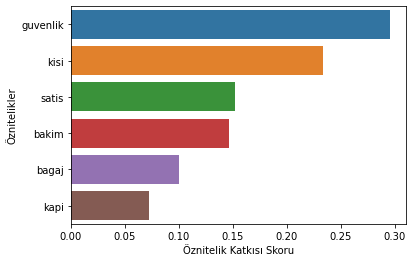

In [24]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Öznitelik Katkısı Skoru')
plt.ylabel('Öznitelikler')

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571

